# Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
from pprint import pprint

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn import ensemble
from sklearn.metrics import plot_confusion_matrix



# Carregando o dataset 

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/RHero-UFRPE/RHero-ML/master/WA_Fn-UseC_-HR-Employee-Attrition.csv")
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Pré processamento de dados 

## Transformação das variáveis categóricas nominais

- Variável *Attrition*

In [ ]:
attrition_map = {'Yes' : 1, 'No' : 0}
dataset['Attrition'] = dataset['Attrition'].map(attrition_map)
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


- Demais variáveis categóricas nominais

In [ ]:
numerical = ['Age', 'DailyRate', 'DistanceFromHome', 
             'Education', 'EmployeeNumber', 'EnvironmentSatisfaction',
             'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
             'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
             'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
             'StockOptionLevel', 'TotalWorkingYears',
             'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
             'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']

categorical = []
for col, value in dataset.iteritems():
    if value.dtype == 'object':
        categorical.append(col)


numerical = dataset.columns.difference(categorical)
attrition_num = dataset[numerical]


In [ ]:
variaveis_categorico = dataset[categorical]
variaveis_categorico = pd.get_dummies(variaveis_categorico)
variaveis_categorico.head(3)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1


In [ ]:
dataset = pd.concat([attrition_num, variaveis_categorico], axis=1)
dataset.head(5)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
1,49,0,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
2,37,1,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
3,33,0,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
4,27,0,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0


## Mudando o índice do Attrition para facilitar o slicing entre atributos e target 

In [ ]:
dataset = dataset.reindex(columns=(['Attrition'] + list([a for a in dataset.columns if a != 'Attrition']) ))
dataset.head()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,1,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1
1,0,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0
2,1,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1
3,0,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
4,0,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0


## Tabela de correlação 

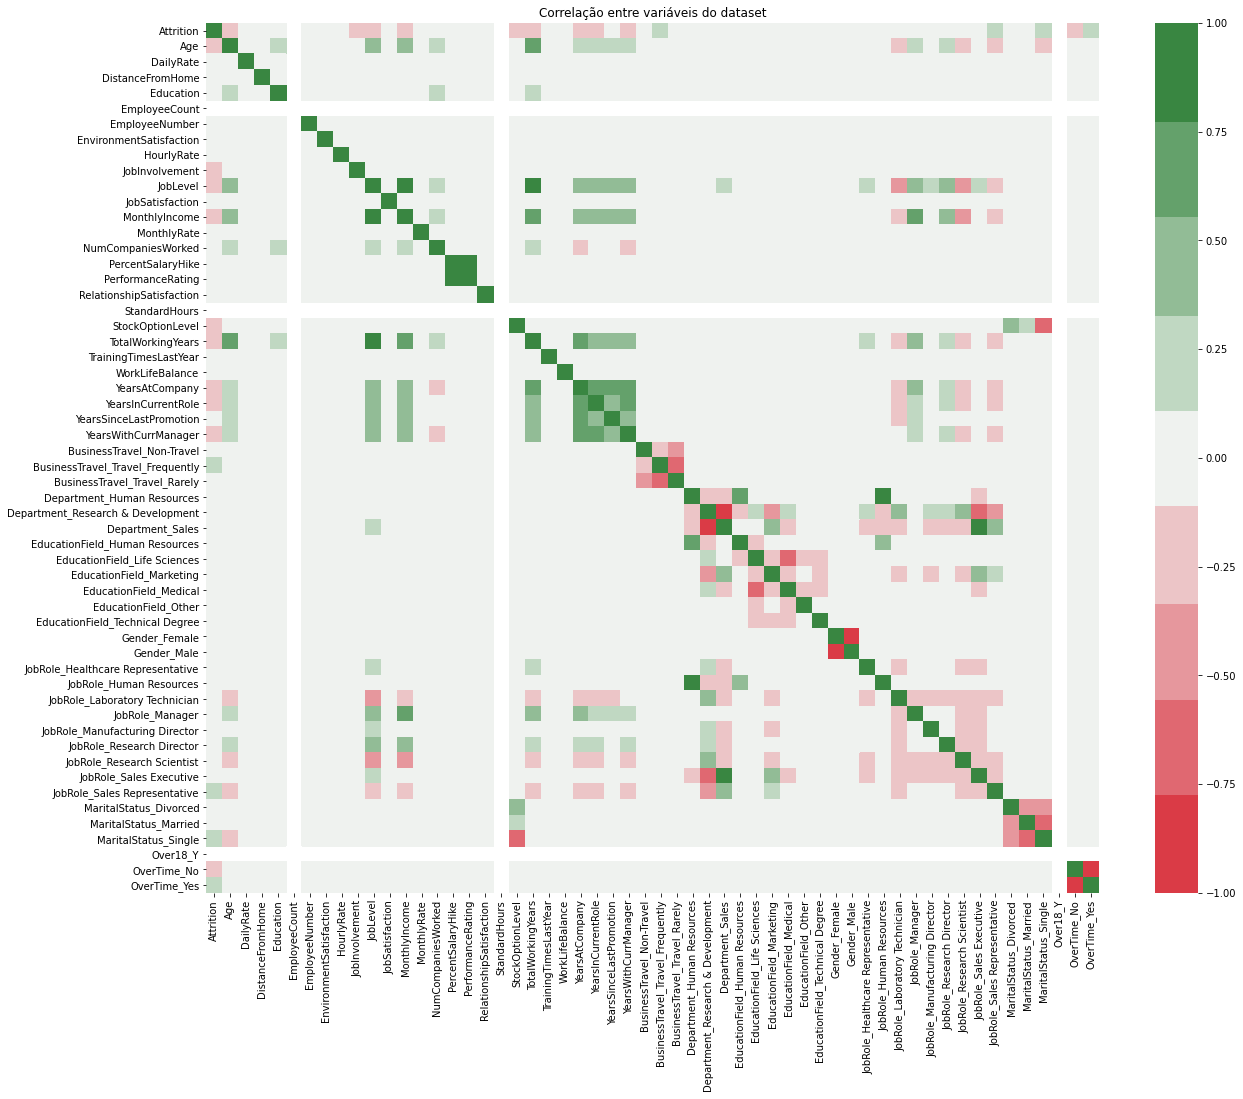

In [ ]:
plt.figure(figsize=(20, 16))
sns.heatmap(dataset.corr(),
            vmin=-1,center = 0, vmax=1,
            fmt = '.2f',
            cmap = sns.diverging_palette(10, 130, n=9))
plt.title('Correlação entre variáveis do dataset')
plt.show()

## Aplicando o Feature Importance

In [ ]:
atributos = dataset.iloc[:,1:]
target = dataset['Attrition']

#Dividindo o dataset em variáveis para o teste e para o treino
atributos_train, atributos_test, target_train, target_test = train_test_split(atributos, target, random_state=42)

model  = RandomForestClassifier(random_state= 42)
model.fit(atributos_train, target_train.ravel())
importance = model.feature_importances_


In [ ]:
colunas = atributos.columns
colunas

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobR

In [ ]:
importance

array([0.0586399 , 0.04662658, 0.03748276, 0.01851031, 0.        ,
       0.04578865, 0.024506  , 0.0371094 , 0.02009173, 0.01977011,
       0.02360137, 0.07569456, 0.04161674, 0.03547862, 0.02851323,
       0.00339318, 0.02052194, 0.        , 0.02785543, 0.0451687 ,
       0.02513478, 0.01857484, 0.04134327, 0.03260857, 0.02194473,
       0.02753105, 0.00352401, 0.01134881, 0.00494427, 0.00152832,
       0.00750192, 0.00688054, 0.00284334, 0.00631678, 0.00593715,
       0.00673526, 0.00354458, 0.00678614, 0.00703877, 0.00855792,
       0.00225636, 0.00266358, 0.00739225, 0.00129655, 0.00345141,
       0.00115043, 0.00555662, 0.00517652, 0.00909558, 0.00476769,
       0.00845795, 0.01877349, 0.        , 0.03369561, 0.03527171])

## Realizando o drop de atributos com valor único nos registros 

In [ ]:
atributos = dataset.iloc[:,1:]
target = dataset['Attrition']
atributos.drop(['Over18_Y', 'EmployeeCount', 'StandardHours'], axis=1, inplace=True)
print("Shape original: ", atributos.shape)
print("Shape pós remoção: ", atributos.shape)

Shape original:  (1470, 52)
Shape pós remoção:  (1470, 52)


## Tabela de correlação (com drop realizado)

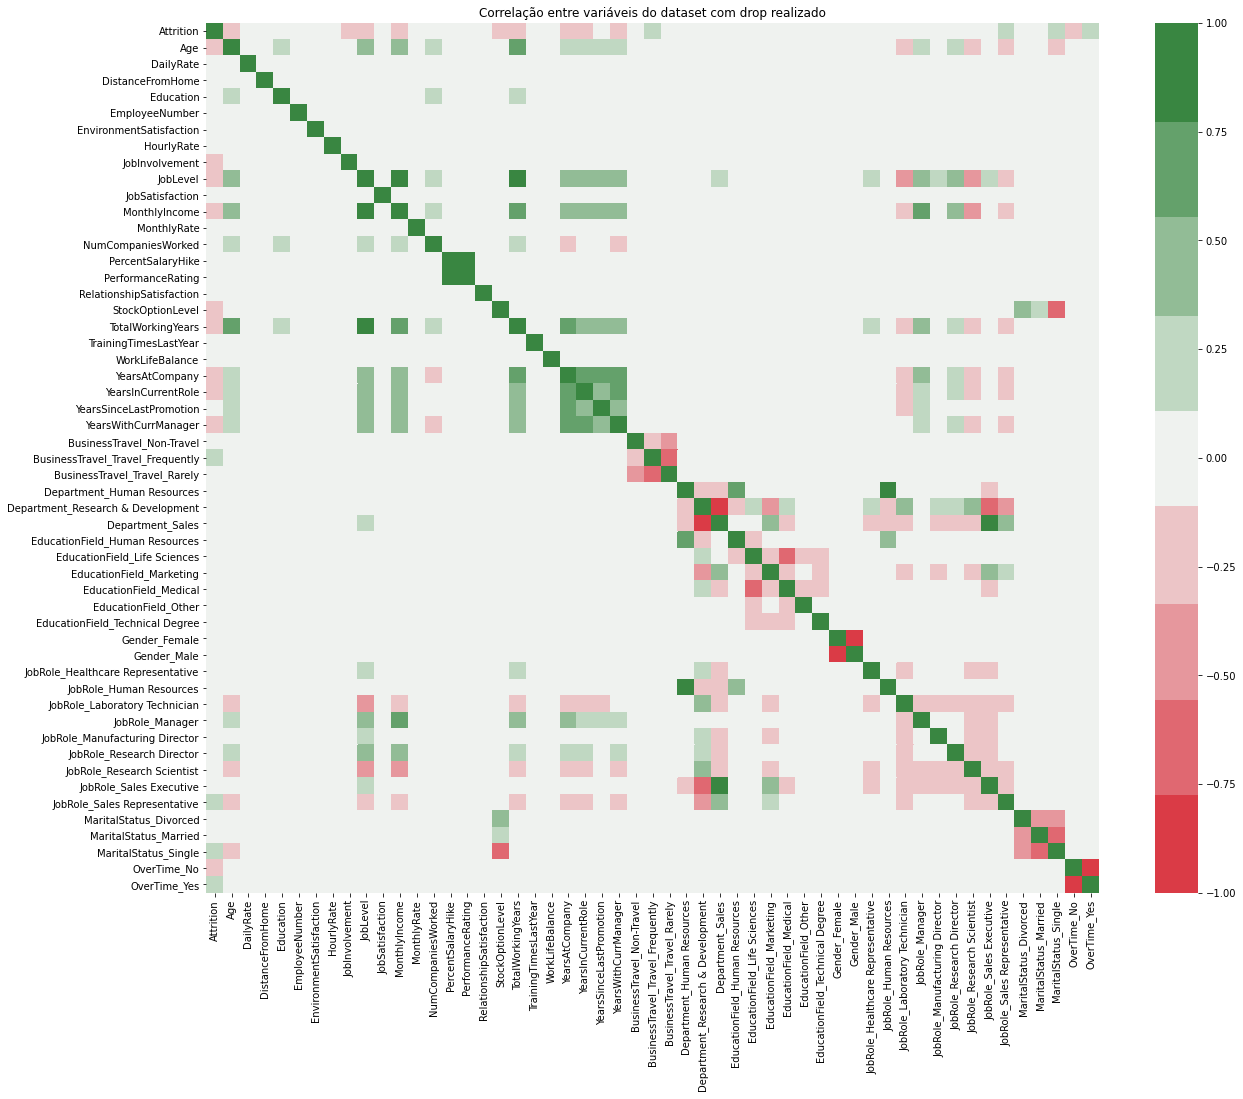

In [ ]:
novodataset = pd.concat([target, atributos], axis=1)
plt.figure(figsize=(20, 16))
sns.heatmap(novodataset.corr(),
            vmin=-1,center = 0, vmax=1,
            fmt = '.2f',
            cmap = sns.diverging_palette(10, 130, n=9))
plt.title('Correlação entre variáveis do dataset com drop realizado')
plt.show()


## Aplicando o Feature Importance (com drop realizado)

In [ ]:
#Dividindo o dataset em variáveis para o teste e para o treino
atributos_train, atributos_test, target_train, target_test = train_test_split(atributos, target, random_state=42)

model  = RandomForestClassifier(random_state= 42)
model.fit(atributos_train, target_train.ravel())
importance = model.feature_importances_

## Exibindo atributos do Feature Importance 

In [ ]:
colunas = atributos.columns
colunas

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'J

In [ ]:
importance

array([0.0593538 , 0.04799729, 0.03831194, 0.01578995, 0.04170263,
       0.02380643, 0.0411294 , 0.02075323, 0.01967973, 0.02226275,
       0.07582238, 0.04353853, 0.02949903, 0.02952421, 0.00396427,
       0.02054858, 0.02915531, 0.04607114, 0.02385286, 0.01706601,
       0.04118787, 0.03033814, 0.02287256, 0.03115029, 0.003389  ,
       0.01012796, 0.00760719, 0.00166657, 0.00690541, 0.00724135,
       0.0025484 , 0.00728868, 0.00526714, 0.00727655, 0.00243197,
       0.00720575, 0.00926314, 0.00602821, 0.00263919, 0.00297164,
       0.00798349, 0.00129373, 0.00214154, 0.00091875, 0.00583853,
       0.00599413, 0.00940385, 0.00592313, 0.0078181 , 0.01662229,
       0.03517208, 0.0356539 ])

Text(0.5, 1.0, 'Importância de cada feature')

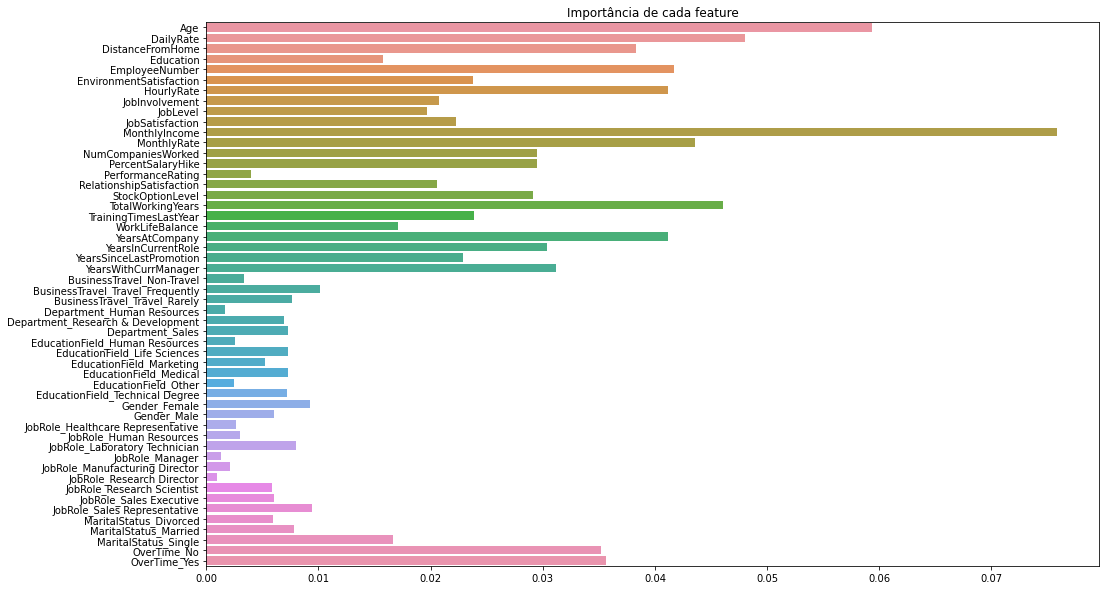

In [ ]:
importances = pd.Series(data=model.feature_importances_, index=atributos.columns)
plt.figure(figsize=(16, 10))
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')


In [ ]:
dic = {}
for i in range(len(colunas)):
  dic[colunas[i]] = importance[i]

listaLabel = []
listaValores = []
for item in sorted(dic, key = dic.get):
    listaLabel.append(item)
    listaValores.append(dic[item])
for i in range(len(listaLabel)):
  pprint(listaLabel[i]+" => "+str(listaValores[i]))

'JobRole_Research Director => 0.0009187546164779696'
'JobRole_Manager => 0.001293731396032525'
'Department_Human Resources => 0.0016665685991232248'
'JobRole_Manufacturing Director => 0.0021415435264863724'
'EducationField_Other => 0.002431967609153244'
'EducationField_Human Resources => 0.0025483990253247256'
'JobRole_Healthcare Representative => 0.0026391875940116943'
'JobRole_Human Resources => 0.0029716397501639872'
'BusinessTravel_Non-Travel => 0.0033889956955837153'
'PerformanceRating => 0.003964265935683189'
'EducationField_Marketing => 0.005267143193126903'
'JobRole_Research Scientist => 0.0058385258397027585'
'MaritalStatus_Divorced => 0.00592312925035968'
'JobRole_Sales Executive => 0.005994131492957466'
'Gender_Male => 0.00602820697194543'
'Department_Research & Development => 0.0069054131450939716'
'EducationField_Technical Degree => 0.007205745334342908'
'Department_Sales => 0.007241351193249892'
'EducationField_Medical => 0.007276545831999732'
'EducationField_Life Science

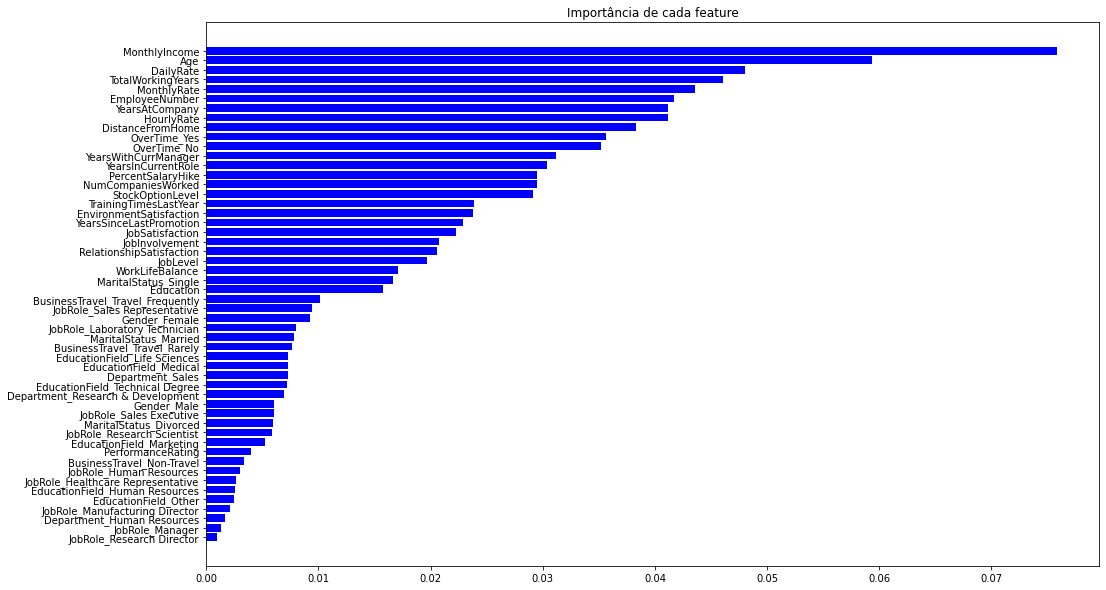

In [ ]:
plt.figure(figsize=(16, 10))
plt.barh(listaLabel,listaValores,align='center', color = "blue")
plt.title('Importância de cada feature')
plt.show()

# Aplicação dos Modelos 

In [ ]:
# Frequência da divisão do dataset em parte de treino e de teste 
print("{0:0.2f}% nos dados de treino". format((len(atributos_train)/len(atributos.index)) * 100 ))
print("{0:0.2f}% nos dados de teste". format((len(atributos_test)/len(atributos.index)) * 100 ))

74.97% nos dados de treino
25.03% nos dados de teste


In [ ]:
#Frequência do atributo Attrition na base de treino
target_train.value_counts()


0    913
1    189
Name: Attrition, dtype: int64

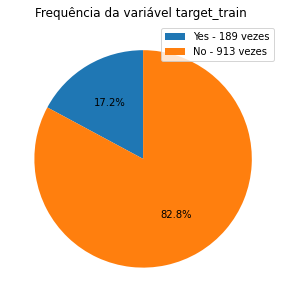

In [ ]:
train_true=189
train_false=913
dados = [train_true,train_false]
legendas = ["Yes - 189 vezes","No - 913 vezes"]
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))
ax.pie(dados, autopct='%1.1f%%',startangle=90)
ax.legend(legendas)
ax.set_title("Frequência da variável target_train ")
plt.show()


In [ ]:
#Frequência do atributo Attrition na base de teste
target_test.value_counts()

0    320
1     48
Name: Attrition, dtype: int64

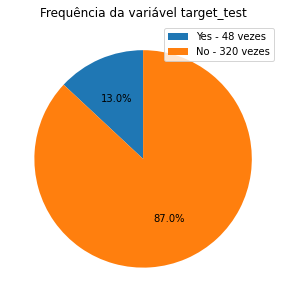

In [ ]:
test_true=48
test_false=320
dados = [test_true,test_false]
legendas = ["Yes - 48 vezes","No - 320 vezes"]
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw=dict(aspect="equal"))
ax.pie(dados, autopct='%1.1f%%',startangle=90)
ax.legend(legendas)
ax.set_title("Frequência da variável target_test")
plt.show()


- Random Forest 

In [ ]:
#Aplicando o modelo
model  = RandomForestClassifier(random_state= 42)
model.fit(atributos_train, target_train.ravel())
predict_RF = model.predict(atributos_test)


In [ ]:
#Acurácia, Confusion Matrix e Classification Report

print("Acurácia do modelo")
print()

print("{0:.2f}%".format(metrics.accuracy_score(target_test, predict_RF) * 100))
print()

print("Confusion Matrix")
print()

print("{0}".format(metrics.confusion_matrix(target_test, predict_RF, labels = [1,0])))
print()

print("Classification Report")
print()

print(metrics.classification_report(target_test, predict_RF, labels = [1,0]))

Acurácia do modelo

86.68%

Confusion Matrix

[[  3  45]
 [  4 316]]

Classification Report

              precision    recall  f1-score   support

           1       0.43      0.06      0.11        48
           0       0.88      0.99      0.93       320

    accuracy                           0.87       368
   macro avg       0.65      0.53      0.52       368
weighted avg       0.82      0.87      0.82       368



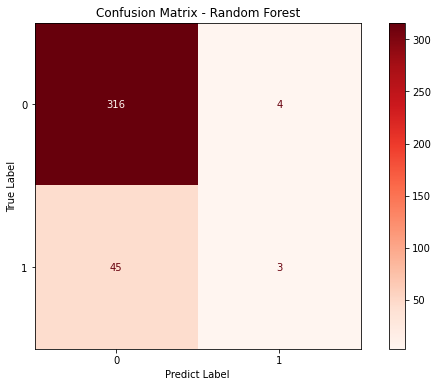

In [ ]:
matrix_RF = plot_confusion_matrix(model, atributos_test, target_test, cmap=plt.cm.Reds, values_format = '.5g')
matrix_RF.ax_.set_title('Confusion Matrix - Random Forest', color = 'black')
plt.xlabel('Predict Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()

## Gradiente Boosting

In [ ]:
modelo_GB = ensemble.GradientBoostingClassifier(random_state=42, n_estimators=100)
modelo_GB.fit(atributos_train, target_train.ravel())
predict_GB = modelo_GB.predict(atributos_test)

In [ ]:
#Confusion Matrix e Classification Report

print("Acurácia do modelo")
print()

print("{0:.2f}%".format(metrics.accuracy_score(target_test, predict_GB) * 100))
print()

print("Confusion Matrix")
print("")

print("{0}".format(metrics.confusion_matrix(target_test, predict_GB, labels = [1,0])))
print(" ")

print("Classification Report")
print("")

print(metrics.classification_report(target_test, predict_GB, labels = [1,0]))

Acurácia do modelo

88.32%

Confusion Matrix

[[ 14  34]
 [  9 311]]
 
Classification Report

              precision    recall  f1-score   support

           1       0.61      0.29      0.39        48
           0       0.90      0.97      0.94       320

    accuracy                           0.88       368
   macro avg       0.76      0.63      0.66       368
weighted avg       0.86      0.88      0.86       368



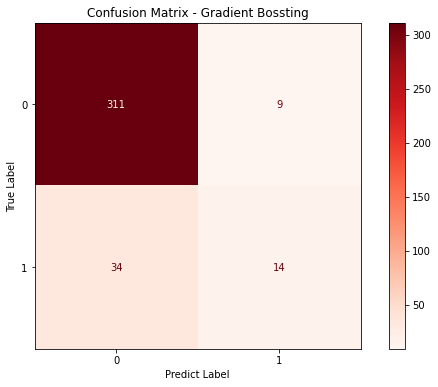

In [ ]:
matrix = plot_confusion_matrix(modelo_GB, atributos_test, target_test, cmap=plt.cm.Reds, values_format = '.5g')
matrix.ax_.set_title('Confusion Matrix - Gradient Bossting', color = 'black')
plt.xlabel('Predict Label', color='black')
plt.ylabel('True Label', color='black')
plt.gcf().axes[1].tick_params(colors='black')
plt.gcf().axes[0].tick_params(colors='black')
plt.gcf().set_size_inches(10,6)
plt.show()